# INVESTIGATING A DATA SET 
Author: Mai Aye  
Udacity Data Analyst Nanodegree

# 1. Introduction

Using exploratory data analysis and statistical testing, I will answer the following questions for the Titanic data set:

1) What factors most likely lead to survival?

2) What are the relationships between demographic traits, such as class and age, that contribute to suvival?

3) What non-obvious factor also leads to survival or death?

In [1]:
import pandas as pd
import numpy as np
from visualize import *
from clean_data import *
from stat_testing import *

# 2. Data Cleaning

In [2]:
titanic = pd.read_csv("titanic_data.csv")

In [3]:
#Renaming columns
titanic.columns
titanic.rename(columns={"Pclass": "Class", "Parch": "No_Of_Parents-Children","SibSp": "No_Of_Siblings-Spouses"}, inplace=True)

In [4]:
#Looking at columns with NA values
search_na(titanic)

Here are the columns with NAs.
Index([u'Age', u'Cabin', u'Embarked'], dtype='object')


In [5]:
#'Cabin' doesn't have any meanings even though it has NAs so its NAs doesn't need further actions
#Let's look the proportion of NAs for Age and Embarked
print titanic["Age"].isnull().sum()
print titanic["Embarked"].isnull().sum()

#There are only 177 NAs for age and 2 NAs for Embarked so replacing these NAs in the analysis is not an issue.  

177
2


In [6]:
#Age and Embarked aren't mostly filled with NAs so now let's fill the the NAs of 'Age' and 'Embarked' with their modes
titanic["Age"] = fill_nan(titanic["Age"])
titanic["Embarked"] = fill_nan(titanic["Embarked"])
print "Replacement finished!"

Replacement finished!


In [7]:

# Before we replace the NAs, let's first replace categorical values with numeric for to efficiently replace NAs and perform
# tasks like correlatin matrix and predictive modeling
search_cat(titanic)


Index([u'Name', u'Sex', u'Ticket', u'Cabin', u'Embarked'], dtype='object')


In [8]:
#Replacing the categorical values in 'Embarked' and 'Sex' with numeric values
#Embarkment C = 1; Embarkment Q = 2; Embarkment S = 3
list(titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].map( {"C": 1, "Q": 2, "S":3} ).astype(int)
print list(titanic["Embarked"].unique())

#Female = 0; Male = 1;
list(titanic["Sex"].unique())
titanic["Sex"] = titanic["Sex"].map( {"female":0, "male":1} ).astype(int)
print list(titanic["Sex"].unique())

[3, 1, 2]
[1, 0]


In [9]:
#Let's check the new data frame to make sure we have the correct data types
search_na(titanic)

Here are the columns with NAs.
Index([u'Cabin'], dtype='object')


# 3.  Exploratory Data Analysis

Let's make a pair plot in seaborn to explore possible relationships between variables.

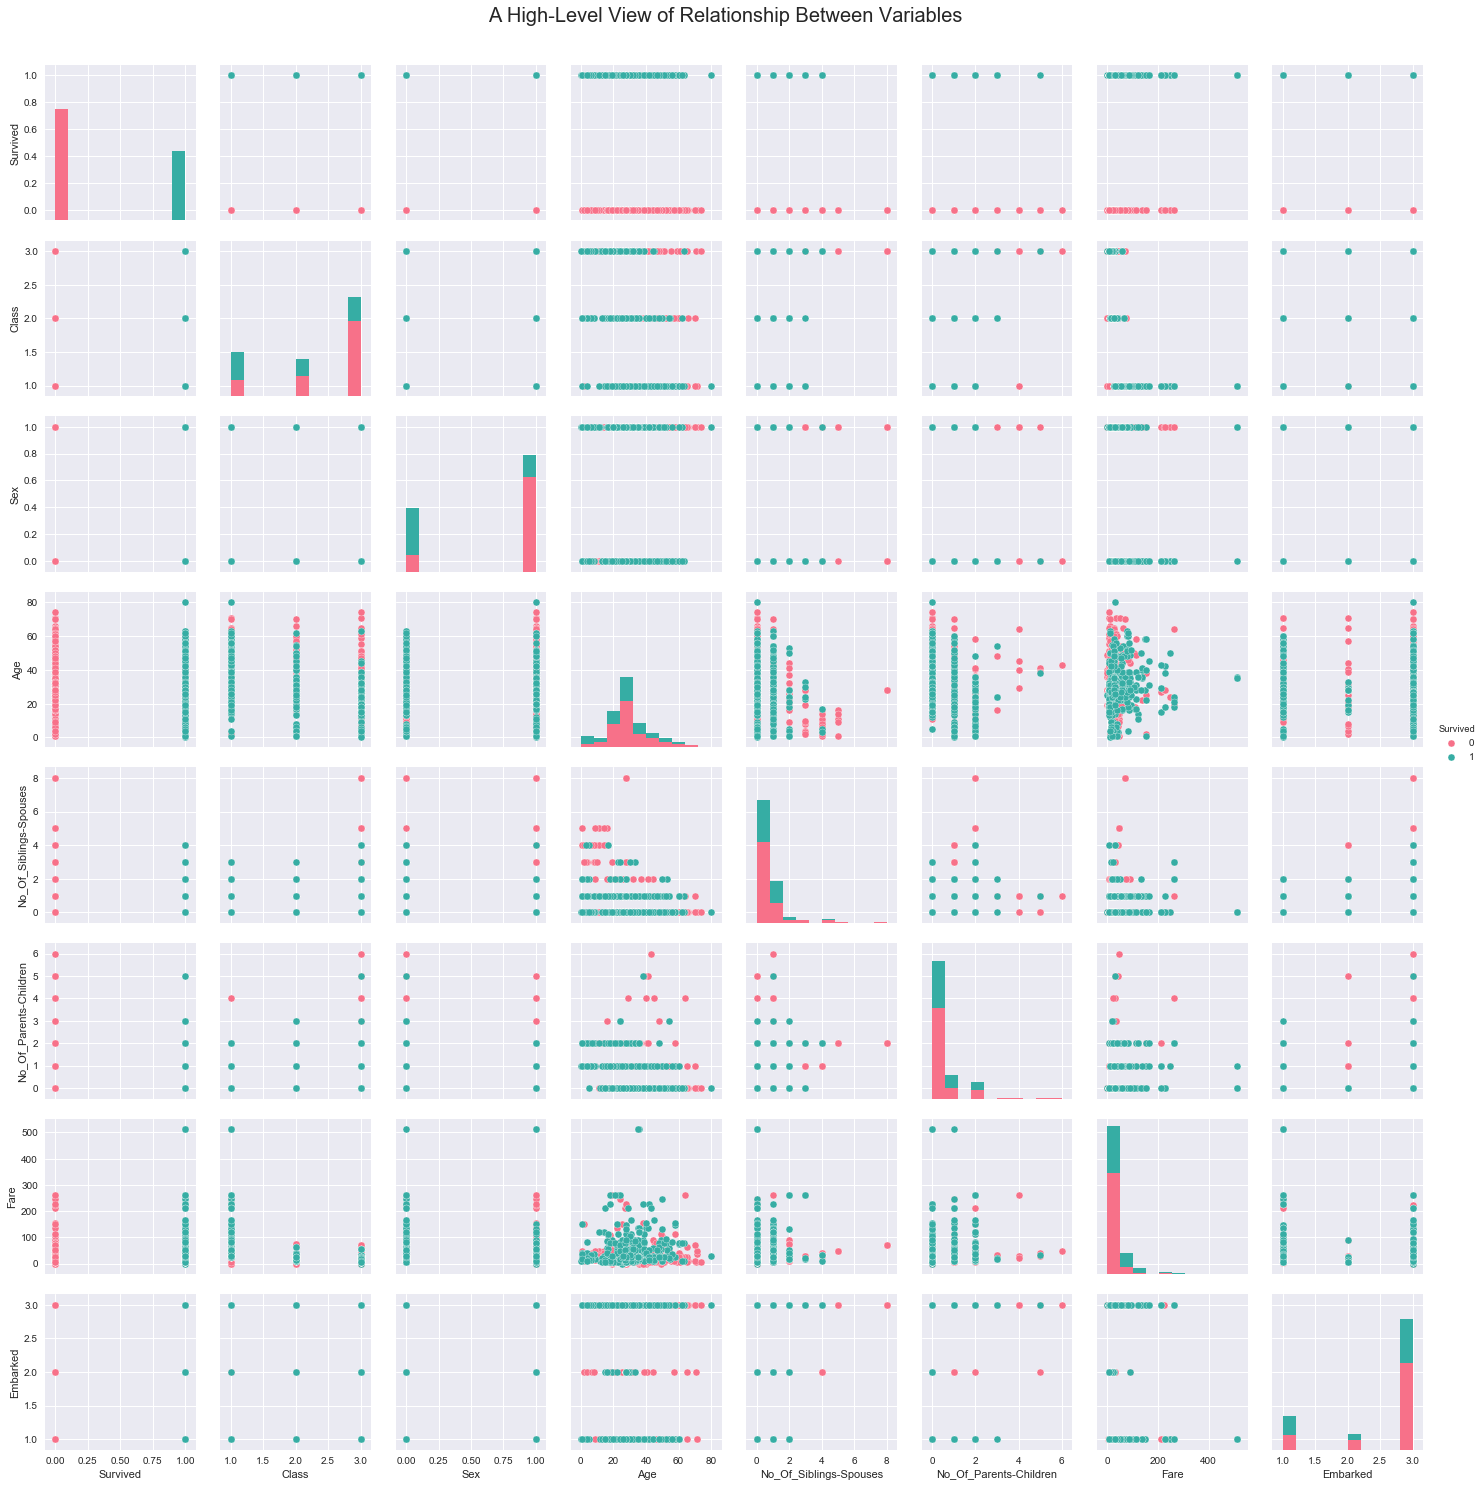

In [10]:
#Printing a seaborn chart to assess possible correlations/interactions between variables
% matplotlib inline
plot_seaborn_pair(titanic[["Survived","Class","Sex","Age","No_Of_Siblings-Spouses","No_Of_Parents-Children","Fare","Embarked"]],
                  "Survived",
                  "p2_seaborn_pair.png")    

There are some interesting patterns in the pair plots above.  Older people in the third class don't survive.  Children and some adults who embarked on the "Q" station don't seem to survive either. Most people in the third class don't survive.  

Let's make a correlation matrix to further explore the correlations between each variables.  

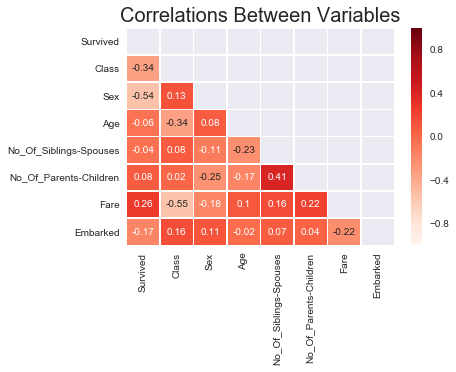

In [11]:
#Printing a correlation plot to assess correlations between different variables
% matplotlib inline
make_corr_matrix(titanic[["Survived","Class","Sex","Age","No_Of_Siblings-Spouses","No_Of_Parents-Children","Fare","Embarked"]],
                 "corrplot.png")


Looking at the correlation matrix above, sex and class have relatively higher correlations to survival compared to other factors.  Being a female is moderately associated with not surviving.  What's also interesting is that being in the first class is also loosely associated with not surviving.  

There are also notable loose and moderate correlations between the following factors:  
    Fare and class;  
    Age and class; and  
    The number of siblings and the number of parents in the family.  
    
It's intuitive that the number of siblings and the number of parents in a family are strongly correlated.  For the rest of the
correlations between factors other than survival, let's plot their distributions to further examine the correlations.

Let's make a boxplot for the distributions of age for each class.

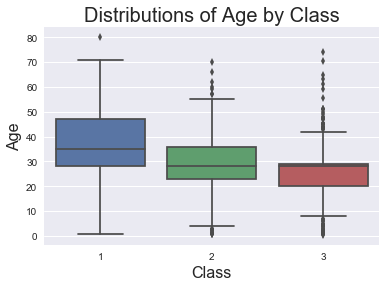

In [12]:
% matplotlib inline
make_boxplot(titanic,"Age","Class","class_age.png")

The median age in the first class tend to be older than those in the second and third classes. There are also a lot of outliers who are both children and seniors in the second and third classes.  

Let's make a boxplot for the distributions of fare for each class.

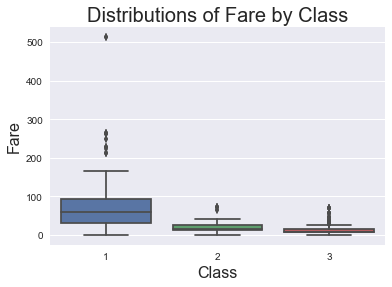

In [13]:
% matplotlib inline
make_boxplot(titanic,"Fare","Class","class_fare.png")

The median fare in the first class is also higher than those in the second and third classes.

People in the first class also paid higher fares than those in the second and third classes.   

Why is being in the first class loosely associated with not surviving in the correlation matrix?  Why is being female also moderately associated with not surviving in the correlation matrix?  Let's look at the survival for each gender broken down by class.

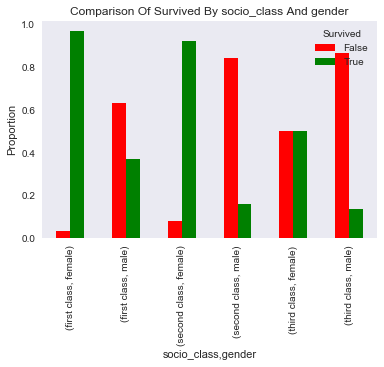

In [14]:
titanic["socio_class"] = titanic["Class"].map( {1:"first class",2:"second class",3:"third class"} ).astype(object)
titanic["gender"] = titanic["Sex"].map( {0:"female",1:"male"} ).astype(object)
% matplotlib inline
make_barchart(titanic.socio_class, titanic.gender,titanic.Survived)

While being female is moderately correlated with not surviving in the correlation matrix, we could see that for each class, the proportions of females tend to survive more than the proportions of males.  

The pair plots indicate older people in the third class don't survive.  Let's also look at survival of each age group broken down by class to investigate this.

In [15]:
#Grouping age groups
labels = ["ages {0} - {1}".format(i, i + 9) for i in range(0, 100, 10) ]
titanic['age_group'] = pd.cut(titanic["Age"], range(0, 105, 10), right=False, labels=labels)
titanic.age_group = titanic.age_group.astype(object) #Convert Categorical data type to string

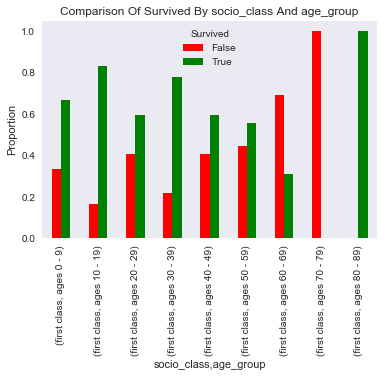

In [16]:
% matplotlib inline
make_barchart(titanic.socio_class[titanic.socio_class == "first class"], titanic.age_group,titanic.Survived)

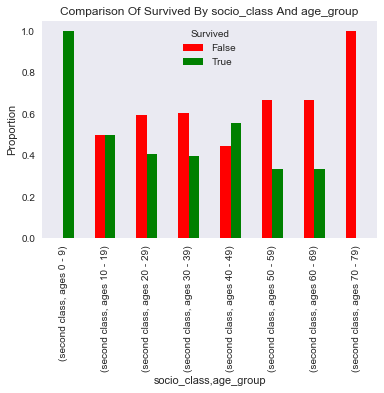

In [17]:
% matplotlib inline
make_barchart(titanic.socio_class[titanic.socio_class == "second class"], titanic.age_group,titanic.Survived)

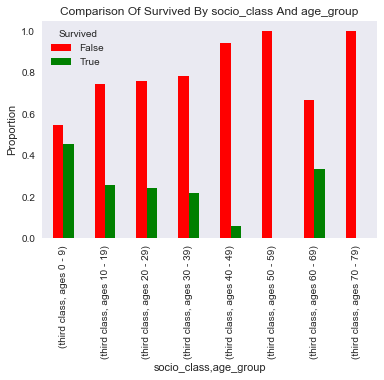

In [18]:
% matplotlib inline
make_barchart(titanic.socio_class[titanic.socio_class == "third class"], titanic.age_group,titanic.Survived)

The proportions of deaths are higher for second and third classes across all age groups compared to those in the in the first class.  Most or all of the seniors in all three classes don't survive.  However,  young people -- from toddlers to those in their thirties -- in the first class are more likely to survive than their peers in the same age groups from the second and third classes, even though the first class has a higher median age than the others.  Hence, the effect that age has on survival is different for each class.

The pair plots also indicate that children and some adults who embarked on the "Q" station don't seem to survive either. Let's also look at the suvival for each station broken down by age. 

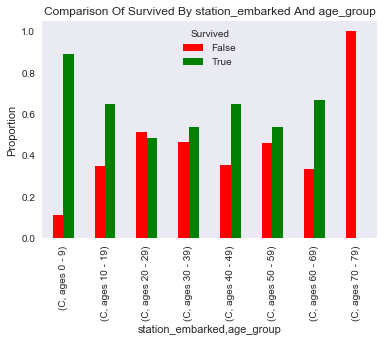

In [19]:
titanic["station_embarked"] = titanic["Embarked"].map( {1:"C", 2:"Q", 3:"S"} ).astype(object)
% matplotlib inline
make_barchart(titanic.station_embarked[titanic.station_embarked == "C"], titanic.age_group,titanic.Survived)

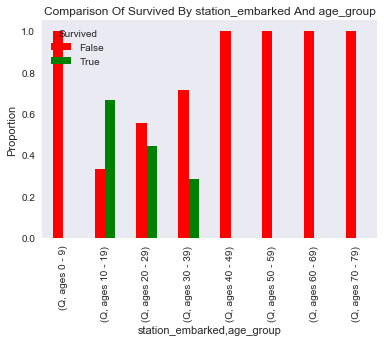

In [20]:
% matplotlib inline
make_barchart(titanic.station_embarked[titanic.station_embarked == "Q"], titanic.age_group,titanic.Survived)

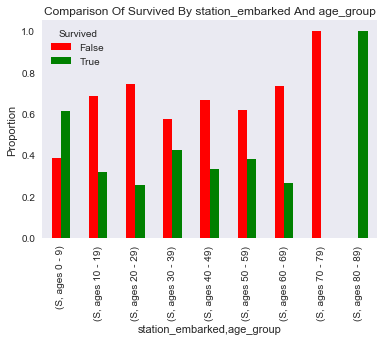

In [21]:
% matplotlib inline
make_barchart(titanic.station_embarked[titanic.station_embarked == "S"], titanic.age_group,titanic.Survived)

The proportions of deaths in "Q" for all age groups are higher than those of the same age groups in the "C" and "S." Notablely, a higher proportion of children -- from ages 0 to 9 -- who embarked Titanic from "Q" died than those who embarked from other stations in the same age group.  

# 4. Observations

1) What factors most likely lead to survival?  
The factors contributing to survival are sex, class, age, and embarkment station. 

2) What are the relationships between demographic traits, such as class and age, that contribute to suvival?  
For each class, the proportions of females tend to survive more than the proportions of males. The effect that age has on survival is different for each class. The proportions of deaths are higher for second and third classes across all age groups compared to those in the in the first class.  Most or all of the seniros in all three classes don't survive.  However,  young people -- from toddlers to those in their thirties -- in the first class are more likely to survive than their peers in the same age groups from the second and third classes, even though the first class has a higher median age than the others. The proportions of deaths for those who embarked at "Q" for all age groups are higher than those of the same age groups who embarked at "C" and "S."

3) What non-obvious factor also leads to survival or death?  
 Notablely, a higher proportion of children -- from ages 0 to 9 -- who embarked the Titanic from "Q" died than those who embarked from other stations in the same age group.  

# 5. Statistical Testing

The limitation with the observations made above about is that correlations and the trends observed in the graphs do not really indicate stastistical significance.  In other words, we do not know whether their relationships that the variables have with survival are just due to chance.  To resolve this issue, let's perform  a statistical test.  Let's use the chi- square test, because our dependent variable, Survived is categorical, and we have above three independent-variable conditions.  Based on the correlation matrix that indicates loose and moderate correlations between variables, I assume that the variable-conditions are independent.  

In [22]:
chi_list = [
            chi_test(titanic.socio_class, titanic.Survived,"The relationship between class and survival"),
            
            chi_test(titanic.gender, titanic.Survived,"The relationship between gender and survival"),
            
            chi_test(titanic.age_group[titanic.socio_class == "first class"], titanic.Survived,
                    "The relationship between age and survival in the first class"),
            
            chi_test(titanic.age_group[titanic.socio_class == "second class"], titanic.Survived,
                    "The relationship between age and survival in the second class"),
            
            chi_test(titanic.age_group[titanic.socio_class == "third class"], titanic.Survived,
                     "The relationship between age and survival in the third class"),
            
            chi_test(titanic.age_group[titanic.station_embarked == "C"], titanic.Survived,
                     "The relationship between age and survival for those who embarked at C"),
            
            chi_test(titanic.age_group[titanic.station_embarked == "Q"] , titanic.Survived,
                     "The relationship between age and survival for those who embarked at Q"),
            
            chi_test(titanic.age_group[titanic.station_embarked == "S"], titanic.Survived,
                     "The relationship between age and survival for those who embarked at S")
           ]
          

# 6. Conclusions

Let's look at the the statistical significance of the relationships between various factors observed earlier in this analysis 
and survival.

In [23]:
for i in chi_list:
    print i  

The relationship between class and survival IS statistically sigificant at 0.000000.
The relationship between gender and survival IS statistically sigificant at 0.000000.
The relationship between age and survival in the first class IS statistically sigificant at 0.009995.
The relationship between age and survival in the second class IS statistically sigificant at 0.000351.
The relationship between age and survival in the third class IS statistically sigificant at 0.002340.
The relationship between age and survival for those who embarked at C IS NOT statistically sigificant at 0.230798.
The relationship between age and survival for those who embarked at Q IS NOT statistically sigificant at 0.385094.
The relationship between age and survival for those who embarked at S IS statistically sigificant at 0.000041.


The observations we made earlier are all statistically significant, except for the relationship between age and survival for those who embarked from station "Q".  Even though the bar graph shows us higher proportions of deaths across all age groups for those who embarked from station "Q" compared to those who embarked from other stations, the chi square test indicates that the this relationship is just due to chance.  On the other hand, the relationship between age and survival for those who embarked at stations "S" is not due to chance and warrants further investigation.  The results of the chi-squared tests suggest to us that making assumptions about the relationships between variables in the data set based on graphs and the correlation matrix could sometimes be misleading.  One limitation of the chi-squared test is that it doesn't tell us the amount of a variable's impact on surivival, so the next step would entail building a predictive model and extracting its coefficients. The other limitation is also the presence of outliers that we saw earlier in the boxplots, especially the children and seniors from the second and third classes.  The reason why ages vary more in these classes also warrant further investigation.   

# 7. References

https://www.kaggle.com/c/titanic

http://stackoverflow.com/

https://www.dataquest.io/mission/174/multi-category-chi-squared-tests

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/tables/chi-square/what-is-the-chi-square-statistic/

https://stanford.edu/~mwaskom/software/seaborn